# Задача 4

In [280]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from math import sin, log
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import linalg
%matplotlib inline

Сгенерируем обучающую выборку размера 20:

In [305]:
X_train = np.random.uniform(low=0.0, high=10.0, size=20)
# generate noise, D = 0.15
eps_train = norm.rvs(0, 0.15, size=20)
y_train = np.sin(X_train) + eps_train

.. и тестовую размера 10000:

In [306]:
X_test = np.random.uniform(low=0.0, high=10.0, size=1000)
# generate noise, D = 0.15
eps_test = norm.rvs(0, 0.15, size=1000)
y_test = np.sin(X_test) + eps_test

Функция, которая составляет из выборки ее полиномиальное признаковое описание $f_d: x \rightarrow (1, x, x^2, \dots, x^{d-1})$ для данного d:

In [307]:
def add_features(X, d):
    X_polynomial = X ** 0
    for i in range(1, d):
        X_polynomial = np.vstack((X_polynomial, X ** i))
    X_polynomial = X_polynomial.T
    return X_polynomial

Графики с точками обучающей выборки, исходной функции и регрессионной зависимости:

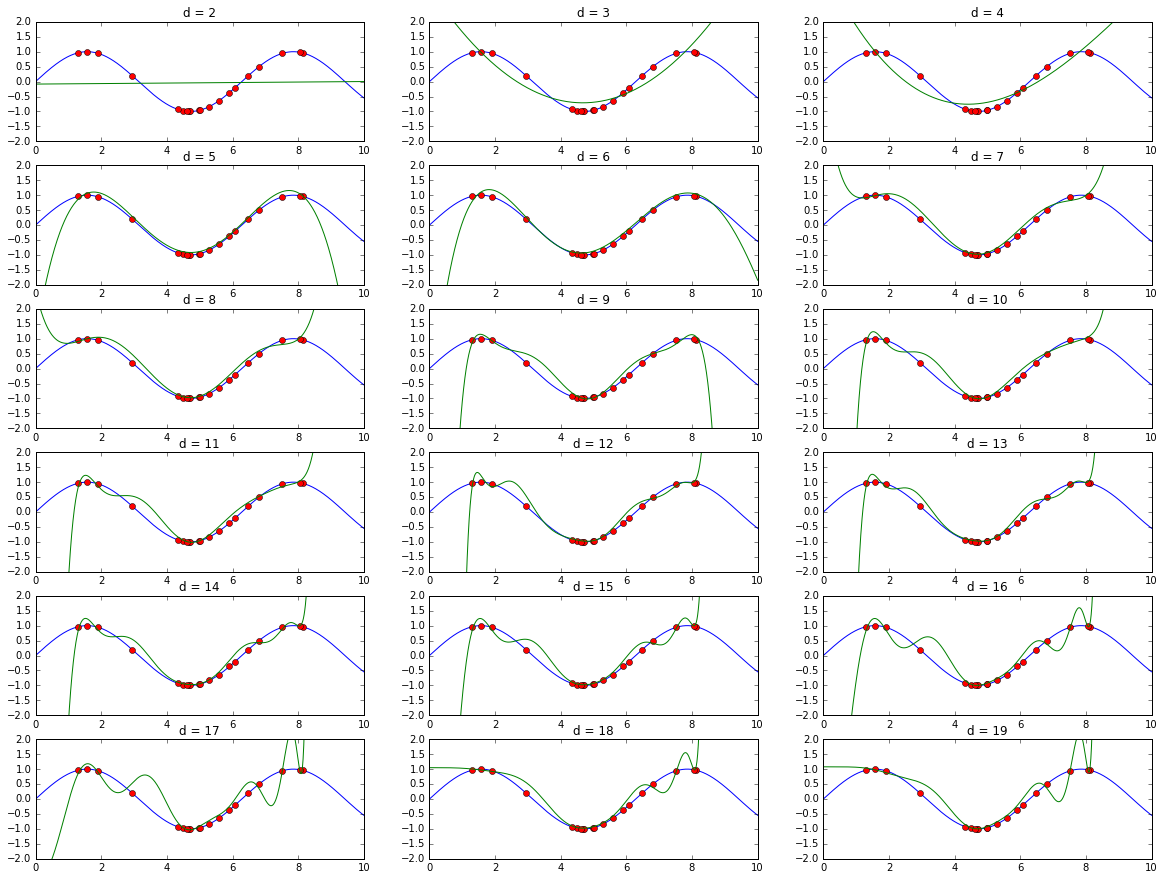

In [308]:
plt.figure(figsize=(20,15))
mse = []
det = []

for d in range(2,20):
    # делаем полиномиальное признаковое описание точек сетки 
    X_featured = add_features(X_train, d)
    
    # обучим линейную регрессию на сгенерированной тренирововчной выборке
    lr = LinearRegression()
    lr.fit(X_featured, y_train)
    
    # сетка с шагом 0.01
    X = np.linspace(0,10,1001)
    
    plt.subplot(6, 3, d - 1)
    plt.title('d = {}'.format(d))
    # точки исходной функции
    plt.plot(X,np.sin(X))
    
    # точки обучающей выборки
    plt.plot(X_train, np.sin(X_train), 'ro')
    
    # ограничим масштаб по оси ординат так, чтобы он не более чем в два раза превышал разброс точек 
    # обучающей выборки по оси ординат. Т.к. sin варьируется от ~-1 до ~1, то просто ограничим ось y 
    # на интервал [-2, 2]:
    plt.axis([0, 10, -2, 2])
    
    # делаем полиномиальное признаковое описание точек сетки 
    X_polynomial = add_features(X, d)
    
    # рисуем линейную регрессию по точкам сетки
    plt.plot(X,lr.predict(X_polynomial))
    
    X_test_featured = add_features(X_test, d)

    mse.append(mean_squared_error(lr.predict(X_test_featured), y_test))
    det.append(log(abs(linalg.det(np.dot(X_featured.T, X_featured)))))

### Зависимость MSE от d:

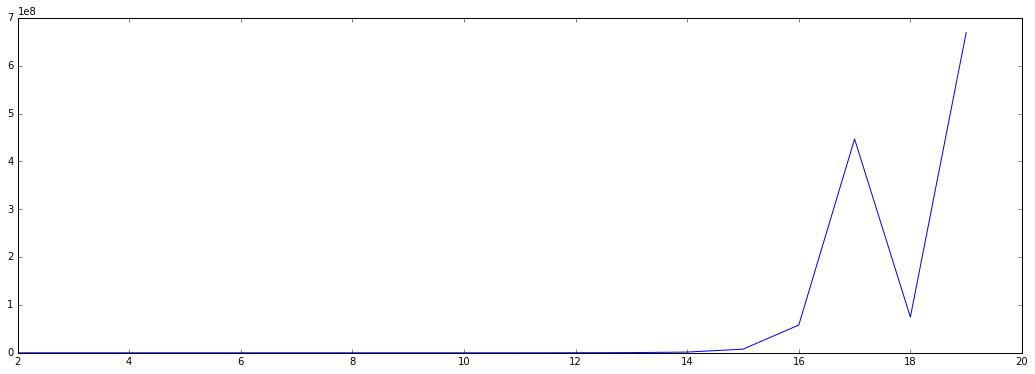

In [309]:
plt.figure(figsize=(18,6))
plt.plot(range(2, 20), mse)
plt.show()

### Зависимость $log\  det\  X_{tr}^T X_{tr}$ от d:

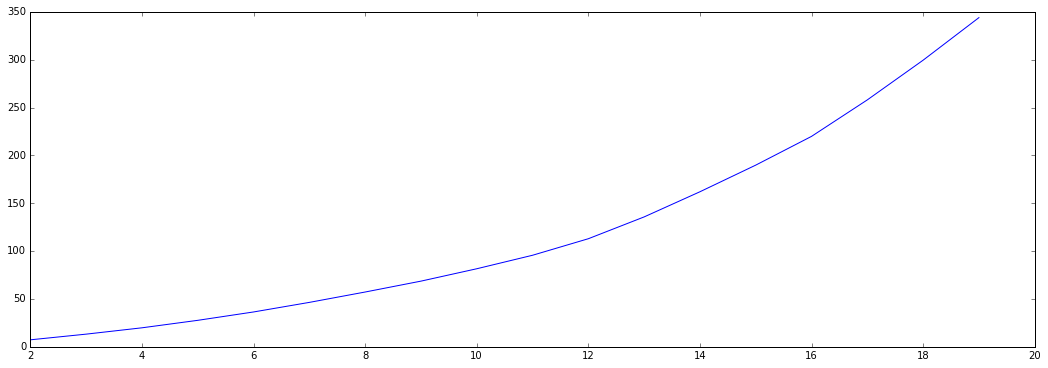

In [310]:
plt.figure(figsize=(18,6))
plt.plot(range(2, 20), det)
plt.show()

Сделаем L2-регуляризацию для d=17 и для $\lambda$=0.1, 1, 10, 100:

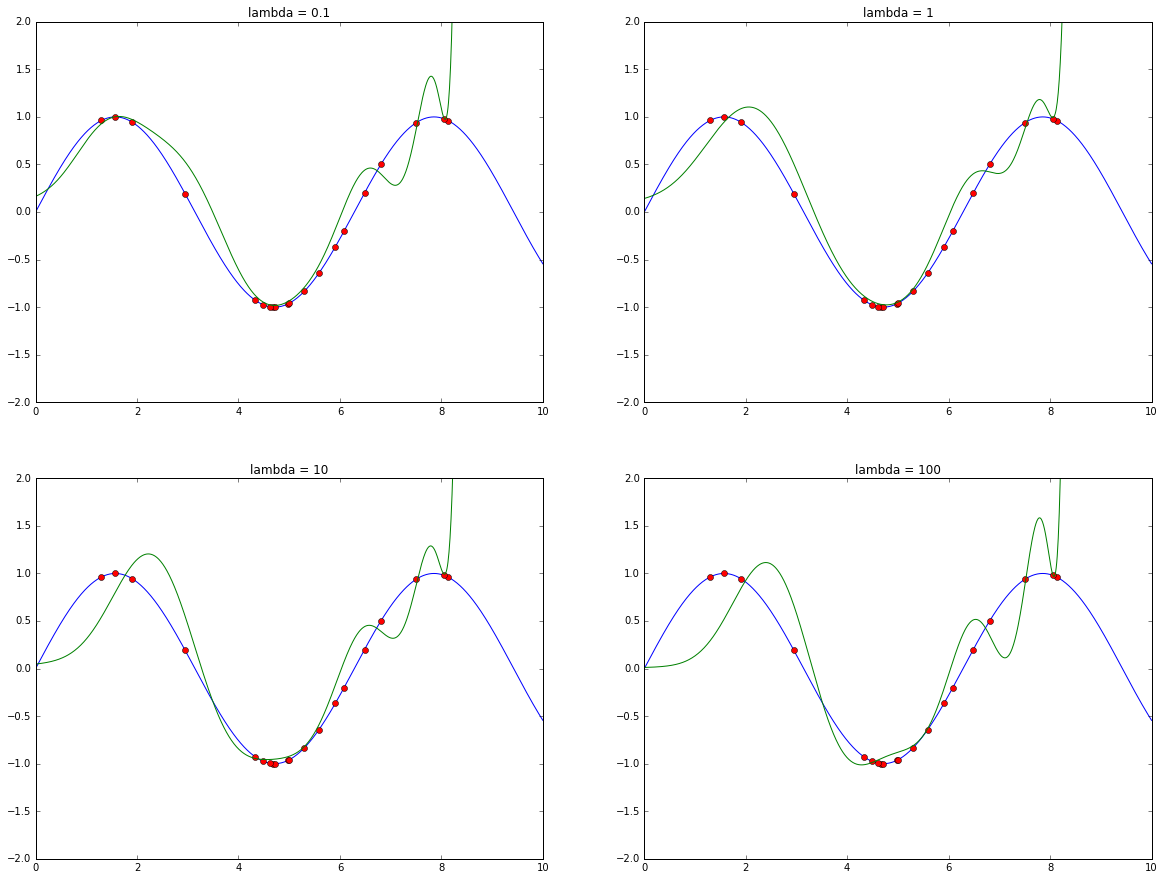

In [311]:
plt.figure(figsize=(20,15))
mse = []
det = []

num_of_plot = 0
for l in [0.1, 1, 10, 100]:
    # делаем полиномиальное признаковое описание точек сетки 
    X_featured = add_features(X_train, 17)
    
    # обучим линейную регрессию с регуляризацией на сгенерированной тренирововчной выборке
    r = Ridge(alpha=l, fit_intercept=False)
    r.fit(X_featured, y_train)
    
    # сетка с шагом 0.01
    X = np.linspace(0,10,1001)
    
    num_of_plot += 1
    plt.subplot(2, 2, num_of_plot)
    plt.title('lambda = {}'.format(l))
    # точки исходной функции
    plt.plot(X,np.sin(X))
    
    # точки обучающей выборки
    plt.plot(X_train, np.sin(X_train), 'ro')
    
    # ограничим масштаб по оси ординат так, чтобы он не более чем в два раза превышал разброс точек 
    # обучающей выборки по оси ординат. Т.к. sin варьируется от ~-1 до ~1, то просто ограничим ось y 
    # на интервал [-2, 2]:
    plt.axis([0, 10, -2, 2])
    
    # делаем полиномиальное признаковое описание точек сетки 
    X_polynomial = add_features(X, 17)
    
    # рисуем линейную регрессию по точкам сетки
    plt.plot(X, r.predict(X_polynomial))
    
    X_test_featured = add_features(X_test, 17)

    mse.append(mean_squared_error(r.predict(X_test_featured), y_test))
    det.append(log(abs(linalg.det(np.dot(X_featured.T, X_featured) + l*np.eye(17)))))

### Зависимость MSE от lambda:

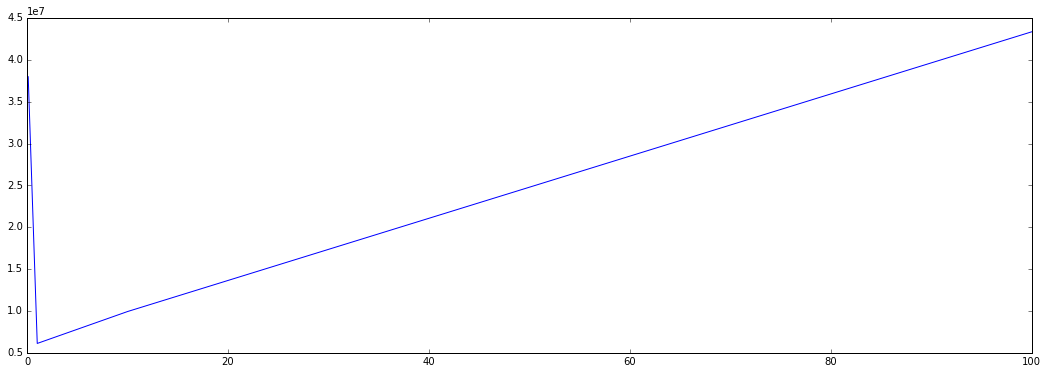

In [312]:
plt.figure(figsize=(18,6))
plt.plot([0.1, 1, 10, 100], mse)
plt.show()

### Зависимость $log\  det\  X_{tr}^T X_{tr}$ от lambda:

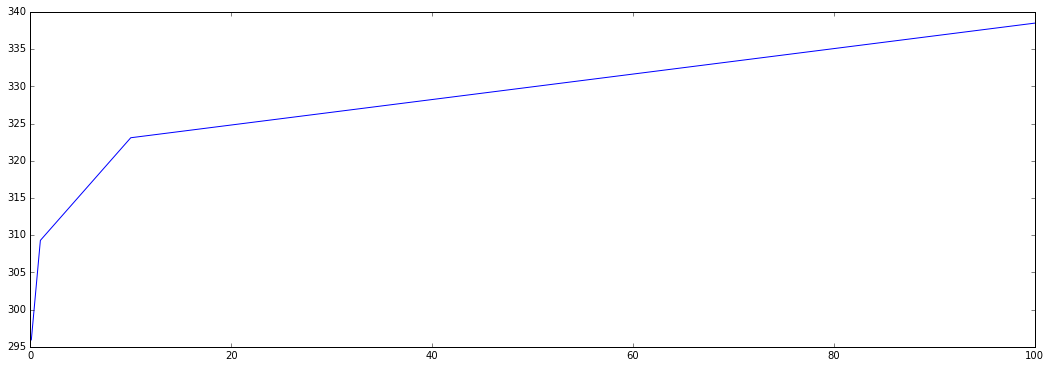

In [313]:
plt.figure(figsize=(18,6))
plt.plot([0.1, 1, 10, 100], det)
plt.show()

## Выводы:

Как видно, без применения регуляризации для d=17 mse был большим (около 4.5), после применения регуляризации стал меньше. И с определителем матрицы при применении Ridge все хорошо, он не ноль.

Также можно заметить, что при lambda=100 модель начинае хуже воспроизводить исходную зависимость. Можно сделать вывод, что параметр регуляризации не должен быть слишком большой. 